In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 선형회귀  
- 종속변수 y와 한 개 이상의 독립변수 x와의 선형상관 관계를 모델링하는 회귀분석 기법  
- 실제 데이를 바탕으로 모델을 생성 -> 다른 입력값을 넣었을 때, 발생할 아웃풋을 예측하는데 있다.  
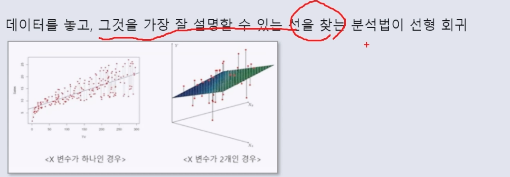  
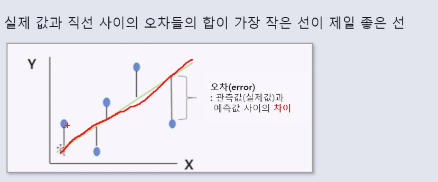

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/perch.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.corr())


sns.heatmap(df.corr(), annot=True)

data2=df['length'].to_numpy()
data2=data2.reshape(-1,1)
target=df['weight'].to_numpy()

X_train, X_test, y_train, y_test= train_test_split(data2,target)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
print(model.coef_)

y_pred = model.predict(X_test)
print(plt.scatter(y_test, y_pred))

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
plt.scatter(df['length'],df['weight'])
plt.plot(range(10,46),model.coef_*range(10,46)+model.intercept_,'red')

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/perch2.csv").to_numpy()
#특성이 3가지 여서 데이터 표준화 필요
X_train, X_test, y_train, y_test= train_test_split(df1,target)
mean=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)
train_scaled=(X_train-mean)/std
test_scaled=(X_test-mean)/std

model = LinearRegression()
model.fit(train_scaled, y_train)
print(model.score(test_scaled,y_test)) #특성이 늘어나서 정확도가 올라간 것을 확인할 수 있다.

## 특성공학을 이용해 특성 늘리기  
- 특성공학: 기존의 특성을 이용해 새로운 특성을 뽑아내는 작업  
- 특성이 부족해 모델학습이 잘 되지 않을 때 사용  
- 각 특성들을 곱하거나, 제곱을 하는 등 새로운 특성을 추출해 낸다.

In [ ]:
target # 정답지

In [ ]:
df1 # perch2

In [ ]:
df1.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False,degree=5) #degree-> 몇 제곱까지 할 것인지
# degree를 높게 설정해 특성을 늘리는 것이 좋을까? -> 컴퓨터가 너무 과하게 학습하게 됨
perch_poly=poly.fit_transform(df1)

### 늘어난 특성  
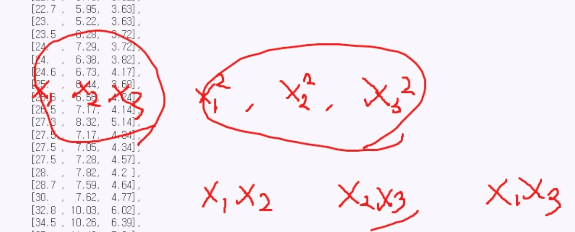

In [ ]:
perch_poly.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(perch_poly,target)
train_scaled=ss.fit_transform(X_train) #train_input(훈련문제집)의 평균,표준편차를 학습해서 얻고 변환해서 train_scaeld안에 넣어라
test_scaled=ss.transform(X_test) # 위에서 구했던 train_input의 평균,표준편차로 변환해서 변수에 넣어라.

model = LinearRegression()
model.fit(train_scaled, y_train)
print(model.score(test_scaled,y_test)) #특성이 늘어나서 정확도가 올라간 것을 확인할

## 로지스틱 회귀 - 분류모
- 선형회귀에 시그모이드 함수를 적용해 분류 모델에 적용  
- 제대로된 확률 표현 가능  
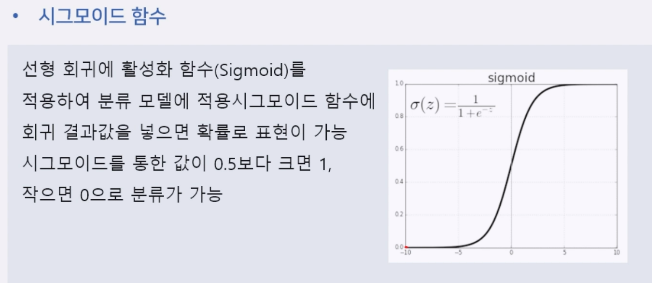  
- y= ax1+ax2+b 를 시그모이드 함수에 넣어 얻게 되는 값을 확인하고 만약 0.7값이 나온다면 0.5이상으로 1로 분류  


In [ ]:
from sklearn.datasets import load_iris #사이킷런// 연습용데이터
# 꽃(세토사, 버지컬러, 버지니카)
iris=load_iris()
iris

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit()
lr.predict_proba() # 도미라고 예측했을 떄 몇퍼센트 확률로 도미라고 예측한 것일까?